C:\Users\shetd\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index: 1.2417331070086974
Silhouette Score: 0.24698026120215896


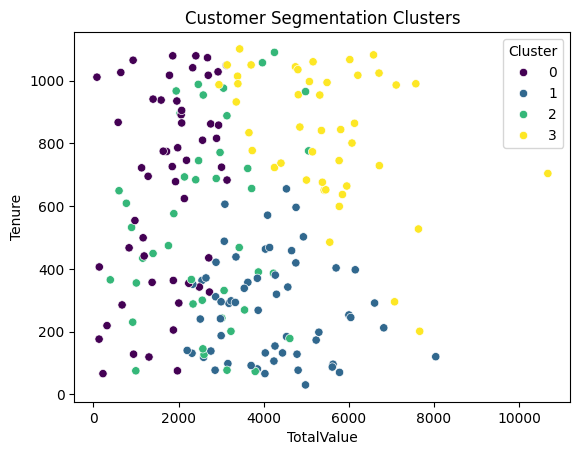

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge data
merged = pd.merge(customers, transactions, on='CustomerID')

# Feature engineering
customer_data = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Price': 'mean',
    'SignupDate': 'first'
}).reset_index()

customer_data['Tenure'] = pd.to_datetime('today') - pd.to_datetime(customer_data['SignupDate'])
customer_data['Tenure'] = customer_data['Tenure'].dt.days

# Preprocessing
features = customer_data[['TotalValue', 'TransactionID', 'Price', 'Tenure']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Evaluation metrics
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette = silhouette_score(scaled_features, clusters)

print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette}')

# Visualization
customer_data['Cluster'] = clusters
sns.scatterplot(x='TotalValue', y='Tenure', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()
